In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the data
data = pd.read_csv('../data/labeled_data.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reference

- Link: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset?resource=download

- Paper: https://www.sciencedirect.com/science/article/pii/S2352340922010356

In [2]:
texts, target = data['tweet'], data['class']
texts_target = data[['tweet', 'class']]

In [3]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)  
    text = re.sub(r'[^\w\s]', '', text) 
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [13]:
import string
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
import nltk

# Inicializa o lemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para outras línguas, se necessário

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
class PreproTweets(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess_text(text) for text in X]

    def preprocess_text(self, text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\b\w{1,2}\b', '', text)  
        text = re.sub(r'[^\w\s]', '', text) 
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
        return text


In [15]:
# Exemplo de pipeline com pré-processamento e TF-IDF
pipeline = Pipeline([
    ('prepro', PreproTweets()),
    ('tfidf', TfidfVectorizer()),
    ('nmf', NMF(n_components=10, random_state=42)),  # Adiciona NMF com 100 componentes
])

In [16]:
pipeline.fit(texts)

Pipeline(steps=[('prepro', PreproTweets()), ('tfidf', TfidfVectorizer()),
                ('nmf', NMF(n_components=10, random_state=42))])

In [19]:
collections = []

for i in range(9):
    pipeline = Pipeline([
        ('prepro', PreproTweets()),
        ('tfidf', TfidfVectorizer()),
        ('nmf', NMF(n_components=i + 3, random_state=42)),  
    ])
    pipeline.fit(texts)
    collections.append(pipeline)

c:\Users\gabri\Documents\classification-nlp\env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [23]:
X_nmfs = [pipeline.transform(texts) for pipeline in collections]

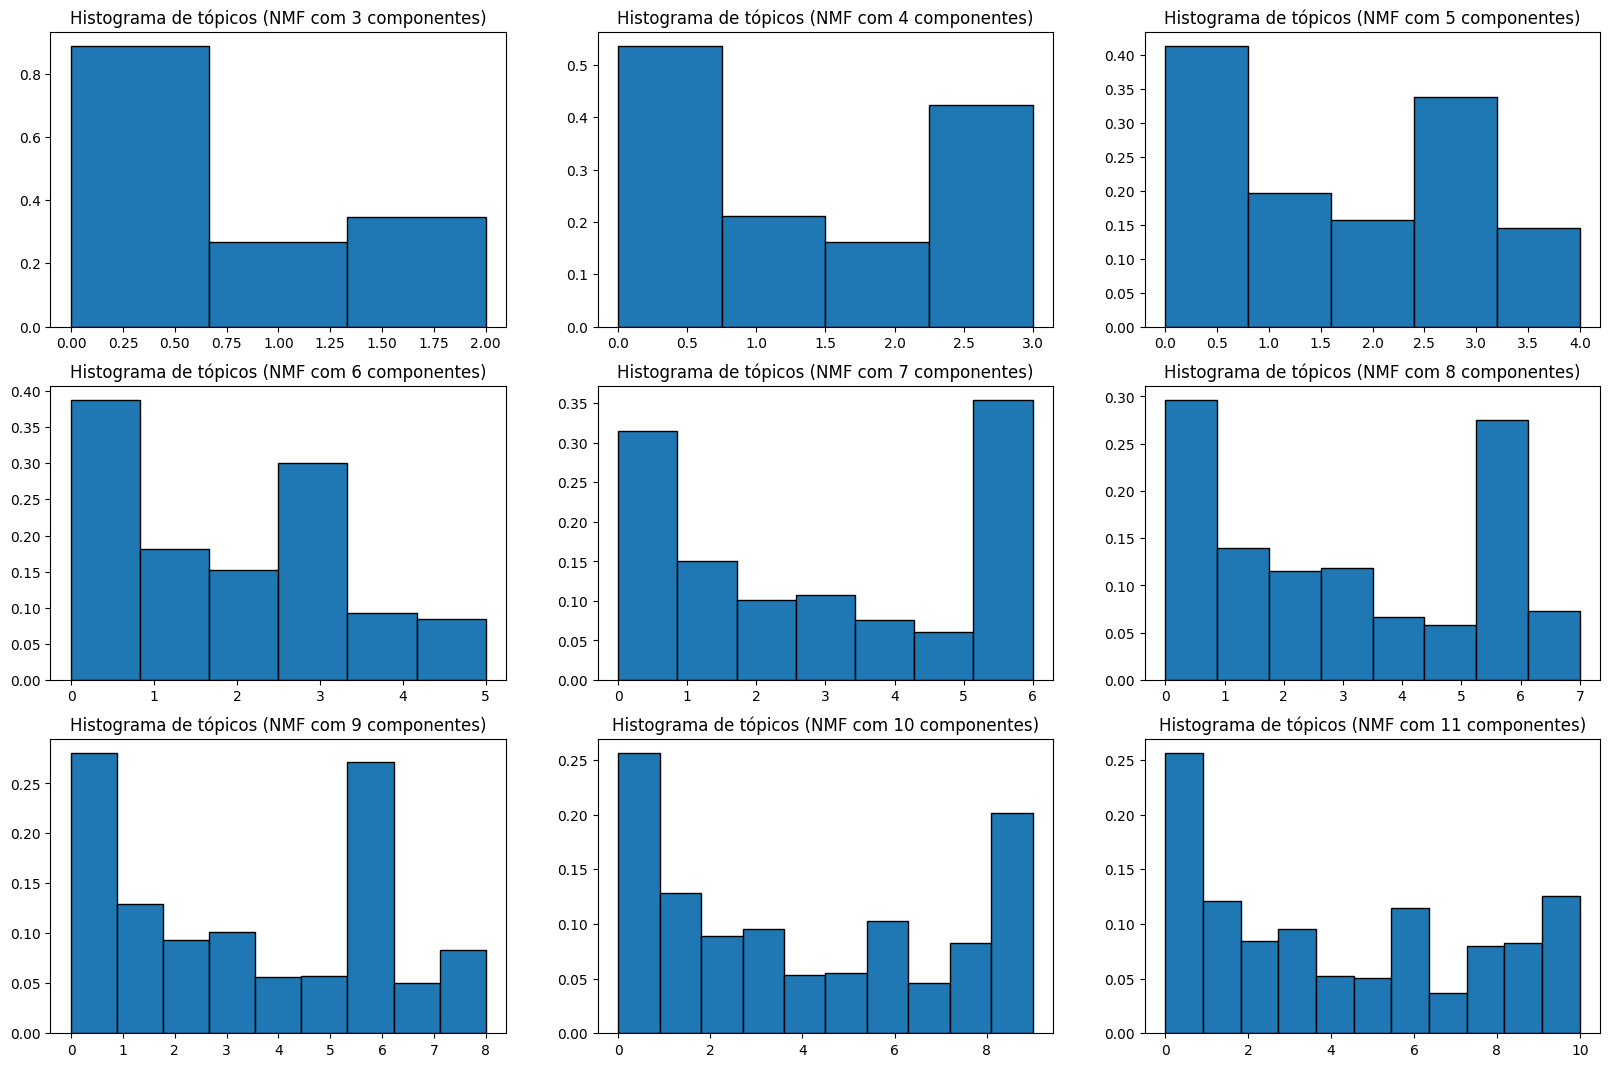

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(20, 13))  # Cria dois subplots lado a lado

for i, ax in enumerate(axes.flat):
    ax.hist(np.argmax(X_nmfs[i], axis=1), bins=i + 3, edgecolor='black', density=True)
    # ax.axis('off')
    ax.set_title('Histograma de tópicos (NMF com ' + str(i + 3) + ' componentes)')
plt.show()
